# Próbkowanie i kwantyzacja

## Twierdzenie Nyquista/Shannona

Wiemy co to jest częstotliwość próbkowania, ale jaką ona powinna mieć wartość? Jaka jest minimalna ilość próbek (minimalna zajętość pamięci) wymagana żeby zachować optymalną jakość sygnału?

Otóż, odpowiedź jest dosyć prosta, ale zanim podamy twierdzenie, zróbmy kilka eksperymentów, żeby zobaczyć podstawowe jego cechy.

Wygenerujmy i narysujmy 1 sekundę sygnału o częstotliwości 1 Hz oraz jednostkowej amplitudzie oraz zerowej fazie. Jaka jest minimalna ilość próbek potrzebna żeby zachować kształt sinusoidy? Jak jest w przypadku sygnału 2 Hz? 3 Hz?

To ćwiczenie może i nie należy do najłatwiejszych. Spróbujmy więc podejść do problemu od drugiej strony. Załóżmy, że częstotliwość próbkowania jest stała i wynosi 10 Hz. Jakie sygnały możemy wygenerować używając tylko 10 próbek? Jak wygląda sygnał o częstotliwości 1 Hz? A 4 Hz? 5 Hz? 6 Hz? 9Hz? 10 Hz? 11 Hz? Spróbuj wygenerować inne częstotliwości. Jakie sygnały wyglądają podobnie, a jakie się różnią?

Możemy pójść o krok dalej. Wygenerujmy sygnał sinusoidalny, gdzie parametr częstotliwości jest liczbą rzeczywistą zmieniająca się w czasie od 1 Hz do dwukrotności częstotliwości próbkowania. Długość sygnału możesz ustawić na 10 sekund, a częstotliwość próbkowania na 1000 Hz. Co się dzieję z sygnałem? Odtwórz go.

Użyj poniższej funkcji *pyplot.specgram* aby zobacyzć widmo sygnału (o tym na następnym ćwiczeniu). Jako pierwszy arguemnt podaj sygnał, a jako drugi (o nazwie Fs) podaj częstotliwość próbkowania. Jak się ten wykres ma do brzmienia sygnału? 

# Rozdzielczość bitowa

Otwórz plik WAV standardową biblioteką 'wave' i podaj jakie on ma parametry (użyj metody getparams). Więcej informacji na temat tej biblioteki znajdziesz tutaj:

https://docs.python.org/2/library/wave.html

Wczytaj teraz plik do pamięci, ale użyj o wiele wygodniejszej metody z biblioteki scipy:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

Narysuj i odtwórz dany plik.

Dokonaj kwantyzacji pliku używając mniejszej ilości bitów na próbkę. Odtwórz dźwięk i porównaj z oryginałem. Co można usłyszeć? Oblicz różnicę między nagraniem oryginalnym i przetworzonym i odtwórz. Czy się charakteryzuje ta różnica?

# Praca domowa

## Zadanie 1

Wczytaj sygnał z pliku i zmniejsz jego częstotliwość próbkowania o połowę kopiując co drugą próbkę. Zobrazuj zjawisko aliasingu przez analizę częstotliwościową przed i po zmianie próbkowania.

## Zadanie 2

Wczytaj sygnał z pliku i dokonaj jego kwantyzacji na wiele różnych sposobów. Zmierz SNR sygnału i zrób wykres porównujący SNR do głebi bitowej dźwięku.

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
from scipy.io.wavfile import read

Fs,y=read('zdanie.wav')
y=y.astype(float)
y-=y.mean()
y/=abs(y).max()+1

In [0]:
def SNR(y_signal, y_conv):
    y_noise=y_signal-y_conv
#    s=y_signal.var()/y_noise.var()
    s=mean(y_signal**2)/mean(y_noise**2)
    return 10*log10(s)

def conv(y,L):
    return 2*floor(L*(y+1)/2)/L-1

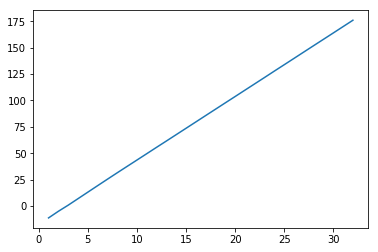

In [0]:
B=range(1,33)

s=[]
for b in B:
    yc=conv(y,2**b)
    s.append(SNR(y,yc))


plot(B,s)

## Zadanie 3

Zrób to samo co w zadaniu 2, ale użyj metody kodowania $\mu$-law.

In [0]:
def ulaw(x,u=255):    
    return sign(x)*log(1+u*abs(x))/log(1+u)
def ulaw_d(y,u=255):    
    return sign(y)*(1/u)*((1+u)**abs(y)-1)

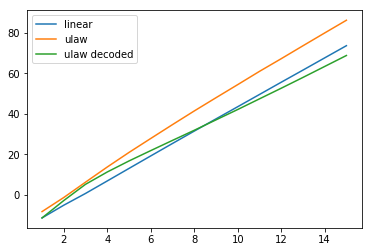

In [0]:
B=range(1,16)

s=[]
for b in B:
    yc=conv(y,2**b)
    s.append(SNR(y,yc))

su=[]
sy=[]
for b in B:
    u=ulaw(y,2**b)
    uc=conv(u,2**b)    
    su.append(SNR(u,uc))
    yc=ulaw_d(uc,2**b)
    sy.append(SNR(y,yc))

plot(B,s,label='linear')
plot(B,su,label='ulaw')
plot(B,sy,label='ulaw decoded')
legend()